In [2]:
#Importing directory
import os

relativePath = os.getcwd()
folders=['midterm']
subfolders= ['data']
sfolders=['enron']
if os.path.isdir(relativePath+'/midterm/data/enron') == 0:
    for folder in folders:
        os.mkdir(os.path.join(relativePath,folder))
        for subfolder in subfolders:
            os.mkdir(os.path.join(relativePath,folder,subfolder))
            for sfolder in sfolders:
                os.mkdir(os.path.join(relativePath,folder,subfolder,sfolder))
else:
    print(relativePath)

C:\Users\DELL PC


In [53]:
import glob
from datetime import datetime
from email.parser import Parser
userPath=relativePath+'\\midterm\\data\\enron\\users\\maildir'
users= os.listdir(userPath)
dates=[]
datesin=[]
x=[]
cleanDatesSent=[]
cleanDatesIn=[]
#print(relativePath)
folder = '/midterm/data/enron/'
for user in users:
    #print(user)
    sentDir= relativePath+folder+'users\maildir/'+user+'/_sent_mail'
    inboxDir= relativePath+folder+'users\maildir/'+user+'/inbox'
    sentmails=glob.glob(sentDir+'\*')
    #print(inmails)
    #for inmail in inmails:
        
        #g = open(inmail,"r")
        #datain=g.read()
        #email = Parser().parsestr(datain)
        #datesin= email['date']
        #datesin=datesin[7:16].replace(" ","")
        #cleanDatesIn.append(datesin)

    for sentmail in sentmails:
        f = open(sentmail,"r")
        data=f.read()
        email = Parser().parsestr(data)
        dates= email['date']
        dates=dates[7:16].replace(" ","")
        cleanDatesSent.append(dates)
        
#print(cleanDatesSent)
frequency={}
for c in cleanDatesSent:
    count=frequency.get(c,0)
    frequency[c] = count + 1
sortedDict = sorted(frequency.items(), key=lambda x: (-x[1], x[0])) # sorted is used to sort dictionary in descending order.
print(sortedDict[0:20])


[('Apr2001', 2721), ('Jan2001', 2501), ('Mar2001', 2496), ('Feb2001', 2434), ('Nov2000', 2429), ('Oct2000', 2381), ('Dec2000', 2288), ('Sep2000', 1988), ('Aug2000', 1897), ('Jul2000', 1485), ('May2001', 1449), ('Jun2000', 1251), ('Mar2000', 942), ('May2000', 889), ('Apr2000', 840), ('Jan2000', 763), ('Feb2000', 689), ('Dec1999', 346), ('Jun2001', 249), ('Jul2002', 21)]


In [57]:
i = 1
priorityList = []

# Looping in order to assign priority to each month.
for priority in range(len(sortedDict)):
    obj1 = sortedDict[priority]
    obj1 = obj1 + (i,)
    priorityList.append(obj1)
    i = i+1
print(priorityList)

[('Apr2001', 2721, 1), ('Jan2001', 2501, 2), ('Mar2001', 2496, 3), ('Feb2001', 2434, 4), ('Nov2000', 2429, 5), ('Oct2000', 2381, 6), ('Dec2000', 2288, 7), ('Sep2000', 1988, 8), ('Aug2000', 1897, 9), ('Jul2000', 1485, 10), ('May2001', 1449, 11), ('Jun2000', 1251, 12), ('Mar2000', 942, 13), ('May2000', 889, 14), ('Apr2000', 840, 15), ('Jan2000', 763, 16), ('Feb2000', 689, 17), ('Dec1999', 346, 18), ('Jun2001', 249, 19), ('Jul2002', 21, 20), ('Sep2001', 18, 21), ('Nov2001', 9, 22), ('Aug2001', 8, 23), ('Jul2001', 7, 24), ('Oct2001', 7, 25), ('Jun2002', 1, 26)]


In [58]:
import csv

#Writing to the csv file
file= 'C:/Users/DELL PC/emailsSent.csv'

with open(file, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Month-Year", "EmailsSent","Priority"])
    a.writerows(priorityList)

In [59]:
import matplotlib.pyplot as plt
label = []
y = []
z = []

# Reading CSV file in order to generate loglog figure.
with open(file,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))

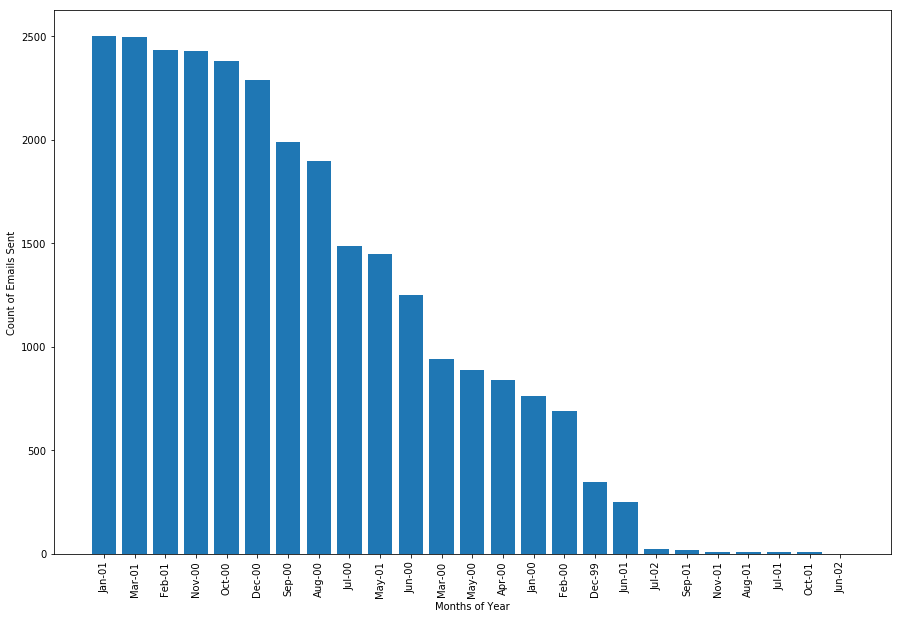

In [61]:
# storing figure in png file and stored in D drive.
pieFig = relativePath+"/"+'emailsSent.png'

plt.figure(figsize=(15,10))
plt.bar(z, y, align='center')
plt.xticks(z, label, rotation=90)
plt.xlabel("Months of Year")
plt.ylabel("Count of Emails Sent")
plt.savefig(pieFig, bbox_inches='tight')
plt.show()